## A. Explanation of the automaton

The automaton construct from `World Cells` which are abstract cells in the world **30x30** grid.

Each cell type contains the basic mechanism which `World Cell` has:

* **Temperature** - each cell has temperature in range of **-50 to 150** which is randomized selected integer based on the cell type (we will get to that later in advance).
* **Air Pollution** - each cell has air pollution percentage which is between **0% - 100%** (Which can cause different events, based on the cell type).<br>
    Each generation, If the air pollution is:
    - **Above 60%** - the temperature of the cell **grows by 0.35 celsius**.
    - **Below 25%** - the temperature of the cell **drops by 0.05 celsius**.
* **Wind & Cloud** - each cell has wind and cloud capabilities, which will be explained in depth in the next section.

> ## Wind & Clouds
In the whole world grid, there's wind and clouds which moving with the help of the wind.<br>
The wind and clouds distributed between all the cells at creation of the world, so that only **10%-15%** of all cells will have wind and cloud (The distribution is randomly selected at creation of the world).


> ## Wind Contents:
> * **Direction** - The wind moves from cell to cell in the **8 possible directions** (Up, Down, Left, Right, Up-Right, Up-Left, Down-Right, Down-Left).<br>
Every generation, the wind moves to the next cell in by it direction.<br>
For example, if the wind direction is up the wind will be passed to the above cell.<br>
In case of multiple winds movement resolves in the same cell, the latest one wins (We do not deal with collision just to make this automaton simple as possible).<br>
Also, when wind direction stuck or points to one of the boundaries of the grid, the wind direction changes to the opposite direction.<br>
For example, if the wind is at the upper left corner in the world grid and direction is up-left, it will be changed to down-right.
<br><br>
> * **Speed** - The wind has speed which determined by the below distribution:
    * _25%_ - No wind speed at all - **0 k/h**.
    * _60%_ - Wind at random speed between **5 - 10 k/h**.
    * _10%_ - Wind at random speed between **10 - 15 k/h**.
    * _5%_ - Wind at random speed between **16 - 20 k/h**. <br>
    The speed determine which cells will be affected from the air pollution contained in the wind by the following rule:<br>
    Each **5 k/h** of speed affect **1 cell** in the wind direction.<br><br>
    _Examples:_<br>
        * **9 k/h + Up direction** - affect only **1 cell** up.
        * **12 k/h + Down direction** - affect only **2 cells** down.
        * **20 k/h + Up-Right direction** - affect only **4 cells** up-right.
<br><br>
> * **Carry Air Pollution** - The wind carries **35%** air pollution of its cell and move it in the direction and speed discussed above.
<br><br>
> * **Carry Cloud** - The wind carries cloud which will be explained in the next section.

> ## Cloud Contents:
> * **Precipitation** - The cloud has precipitation percentage which is between **0% - 100%** and randomly selected at creation of the world.<br>
    Each generation, the precipitation of the cloud **grow by 10%**.
<br><br>
> * **Rain** - The cloud can drop rain when its **precipitation** reaches **100%**.<br>
    When there's rain in some cell, it **cools temperature** by **1.5 celsius** and **reduces** air pollution by **25%**.<br>
    After that, the precipitation resets back to **0%**.

Now, let's introduce the cell types:

> ## Earth Cell
Represent earth in the world, which has random temperature from **20 to 28 celsius** which selected at creation of the world.<br>
Doesn't produce air pollution.
> ### Events
> - When there's rain with less than **5% air pollution**, earth cells become `Forest Cells`.


> ## Sea Cell
Represent sea in the world, which has random temperature from **16 to 24 celsius** which selected at creation of the world.<br>
Doesn't produce air pollution.

> ### Events
> * When the temperature reach **100 celsius (or more)**, sea cells become `Earth Cells`.
> * When the temperature reach **-1 celsius (or less)**, sea cells become `Iceberg Cells`.

> ## City Cell
Represent city in the world, which has random temperature from **20 to 28 celsius** which selected at creation of the world.<br>
Produces **8% air pollution** each generation.

> ### Events
> * When the temperature reach **95 celsius**, city cells become `Earth Cells`.
> * Each generation, City cells **heats temperature** in their neighborhood by **0.02 celsius**

> ## Iceberg Cell
Represent iceberg in the world, which has random temperature from **-24 to -10 celsius** which selected at creation of the world.<br>
Doesn't produce air pollution.

> ### Events
> * When the temperature reach **0 (or more) celsius**, iceberg cells become `Sea Cells`.
> * Each generation, iceberg cells **cools temperature** in their neighborhood by **0.025 celsius**

> ## Forest Cell
Represent forest in the world, which has random temperature from **18 to 26 celsius** which selected at creation fo the world.<br>
Doesn't produce air pollution.

> ### Events
> * Each generation, forest cells **reduce air pollution** in their neighborhood by **3%**.
> * When the temperature reach **60 celsius (or more)**, forest cells become `Earth Cells`.
> * When the air pollution reach **80% (or more)**, forest cells become `Earth Cells`.


## B. Actual Cellular Automata Implementation

### Requirements:

None.

### Instructions:

The code written Python 3.8.

The code can be run from this notebook without any configuration at all (it includes virtual environment which contains Python 3.8) or from the `main.py` explicitly inside the this folder.

### To run the code inside this notebook:

Simply run the next cell:

In [ ]:
import os
import sys

# Just a notebook initialization tag for fixing import issues.
# The below code will add to the path the current module for using relatives imports 
# in the actual project also.
if 'NOTEBOOK_INITIATED_FLAG' not in globals():
    NOTEBOOK_INITIATED_FLAG = True
    module_path = os.getcwd()

    if module_path not in sys.path:
        sys.path.append(module_path)

# Importing the global warming automaton package
from main import AutomatonGUIRunner

# Acutal Code for the automaton. Start instance of automaton runner and run it.
automaton_runner = AutomatonGUIRunner()
automaton_runner.run()

### To run the code from the folder explicitly:

1. Open Terminal or CMD and navigate to this folder.

2. Run the next command:

> Windows:
<br>`.\venv\bin\python3 main.py`

> Linux / MacOS:
<br>`./venv/bin/python3 main.py`

**OR** 
If you have `PyCharm` installed, just run the `main.py` file from the `PyCharm` editor.

You should see a screen which looks like that:

### Photo of the automaton

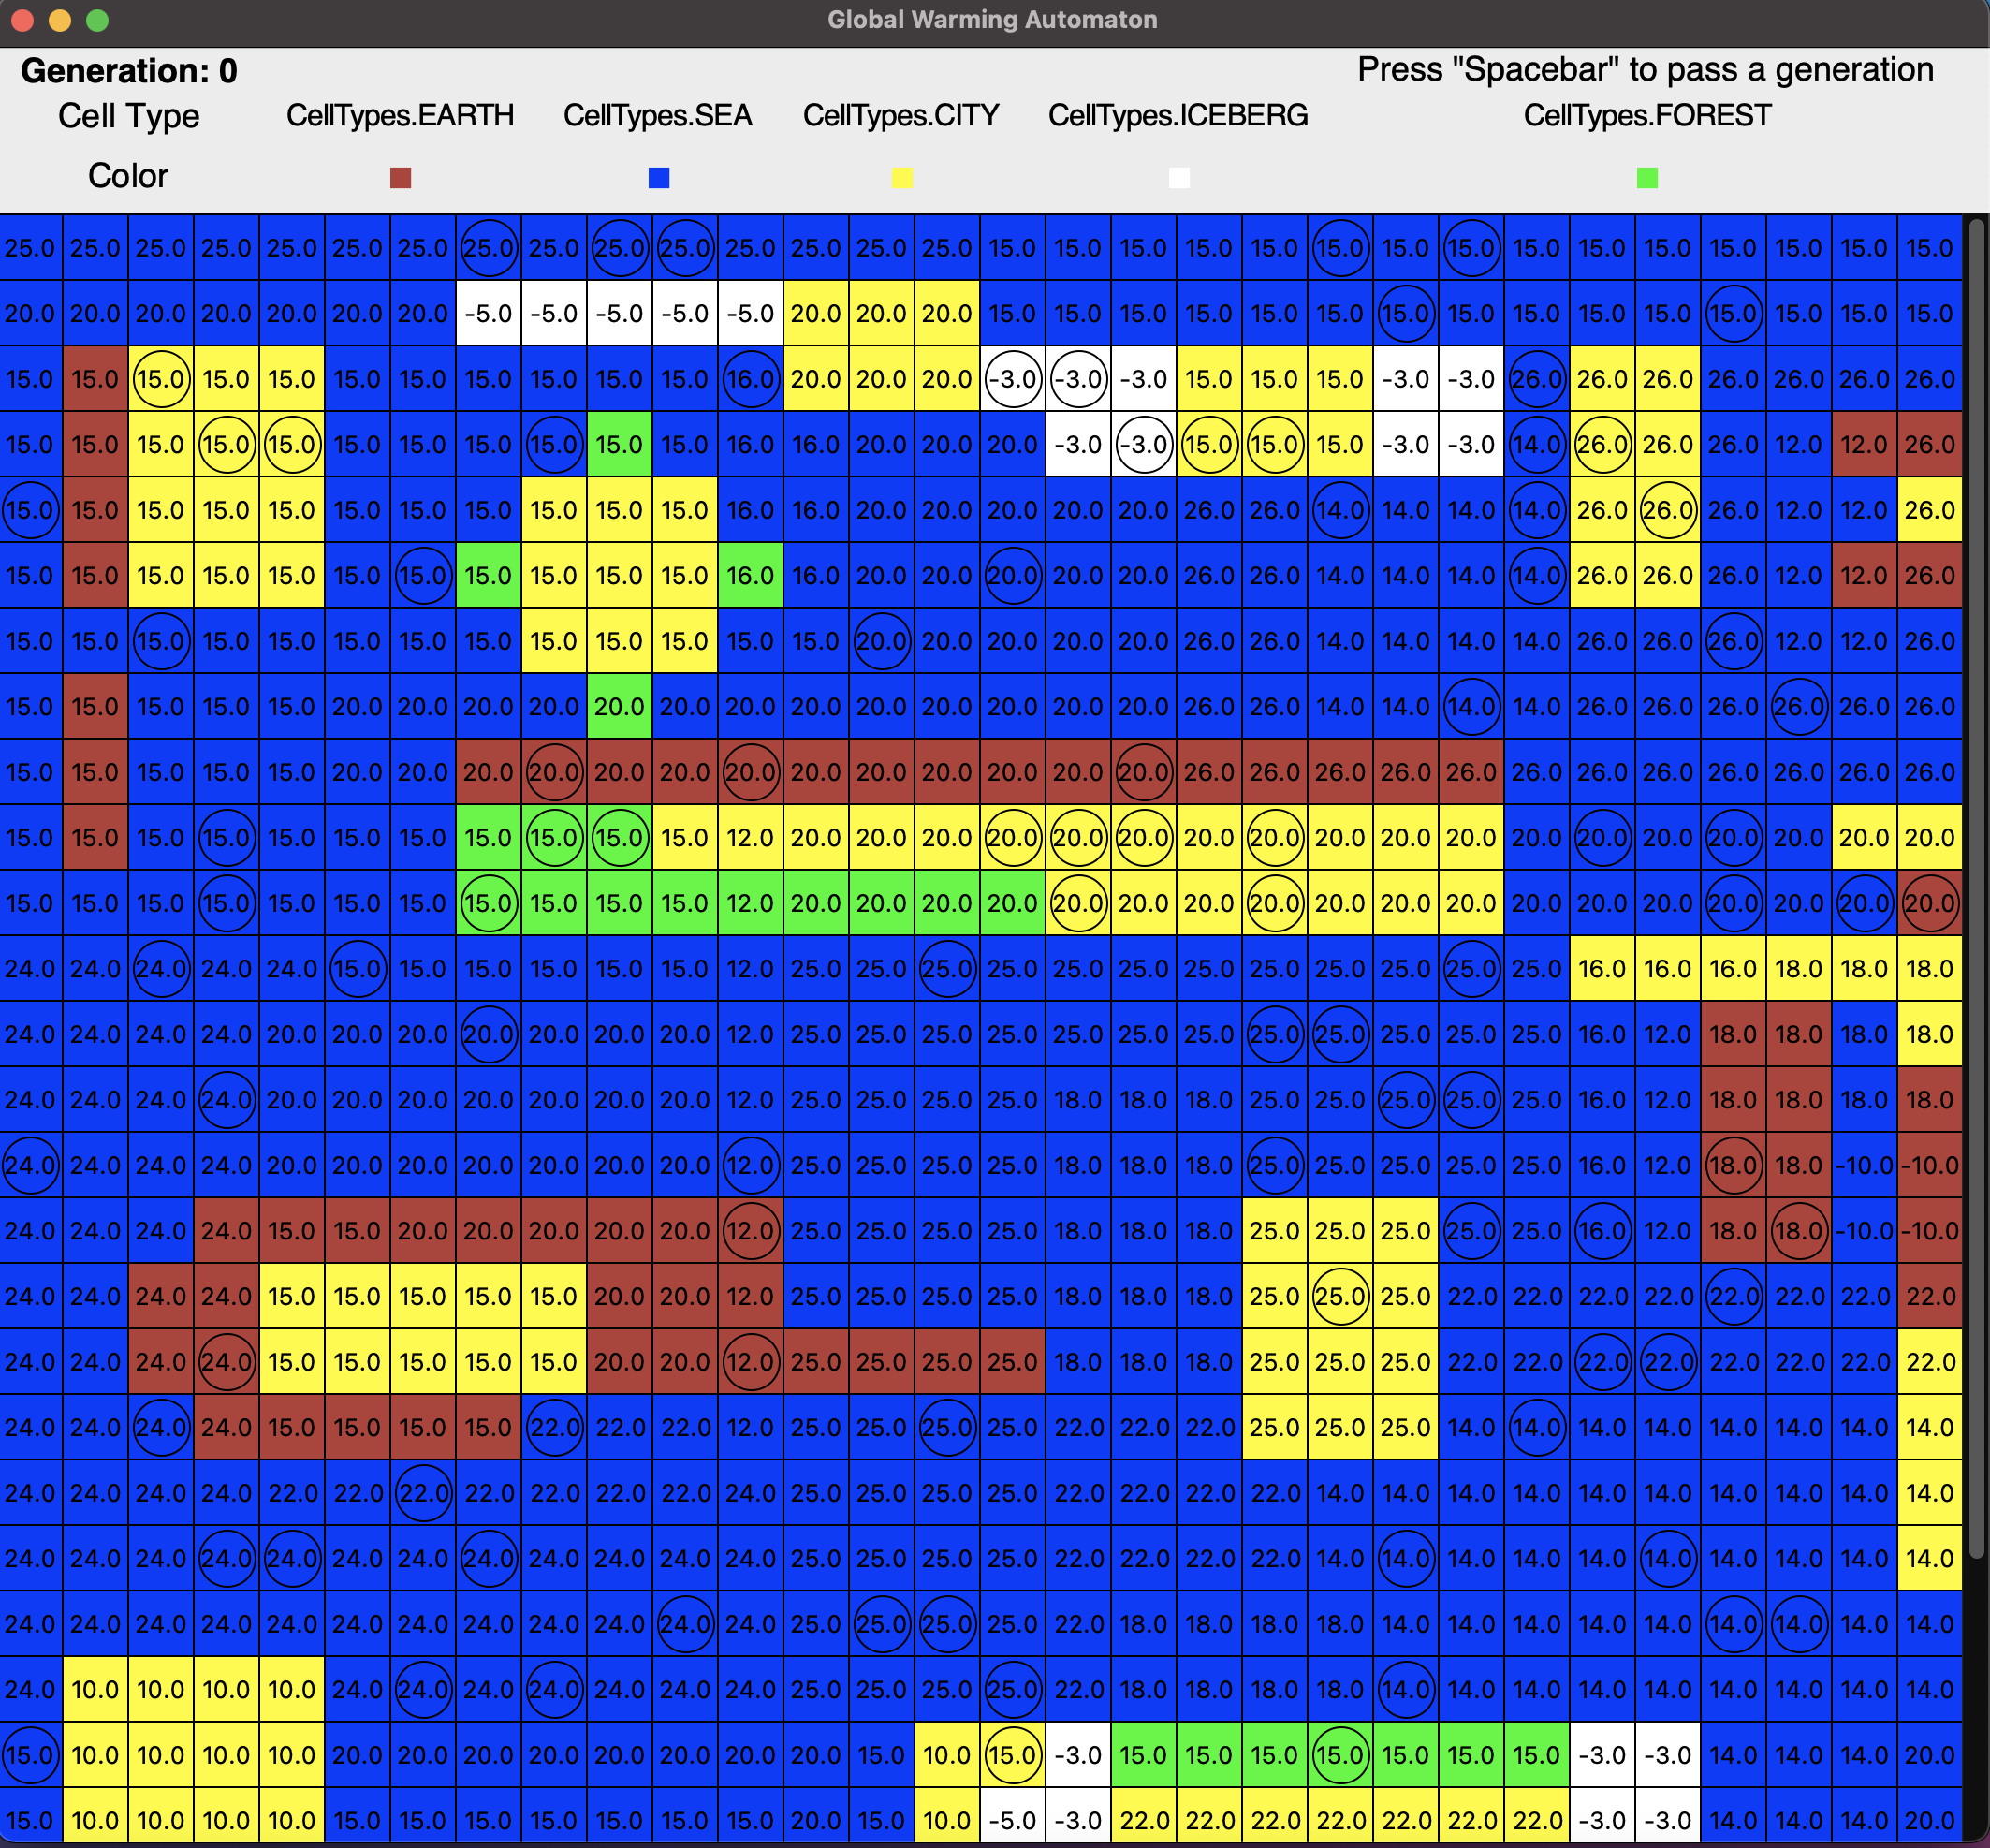

### Visual Symbols Explanation

>## Cell Types:
> * **Earth** - Red
> * **Sea** - Blue
> * **City** - Yellow
> * **Iceberg** - White
> * **Forest** - Green
<br>

>## Cell Environment:
> * **Wind & Clouds** - When a cell has a **circle**, it means it has wind and cloud properties.
<br>

>## Cell Information:
> We can see any cell information by clicking at the cell.<br>
> We'll get an information box which should be look like the below example:
> 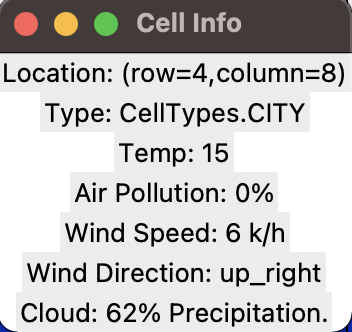

>## Generation:
> At the **top left corner**, we can see the **current generation number**.<br>
> Each time we press **Spacebar**, a generation will be passed.

### World grid representation

> ## World file contents:
> The world file is a CSV file which contains the cells types, and if given also the temperature and air pollution of the cell (instead picking those values randomly).<br><br>  
> Each cell value is formatted as the following:  
> **CELL_TYPE;TEMP;AIR_POLL**<br><br>
> **CELL_TYPE** - (REQUIRED) The type of the cell  
> **TEMP** - (OPTIONAL) The temperature of the cell  
> **AIR_POLL** - (OPTIONAL) The air pollution of the cell<br><br> 
> Notice the **;** separator character, it is <u>**mandatory**</u>.

## C. Finding default values for stable automaton for a year (365 generations)

### 1. Measurement the range of each parameter over the year, include the mean and standard deviation 

|   Parameter   	|  Min 	| Max 	| Average 	| Standard Deviation 	|
|:-------------:	|:----:	|:---:	|:-------:	|:------------------:	|
|  **Temperature**  	|  -50 	| 150 	| 50.7277 	|       49.6356      	|
| **Air Pollution** 	| 1.00 	|  0  	|  0.6332 	|       0.4502       	|

### 2. Graph representation of standardized parameters values

Because each generation (day) we have 30x30 cells with different temperature / air pollution, we calculated the standardization of each cell parameters by the following rule:  
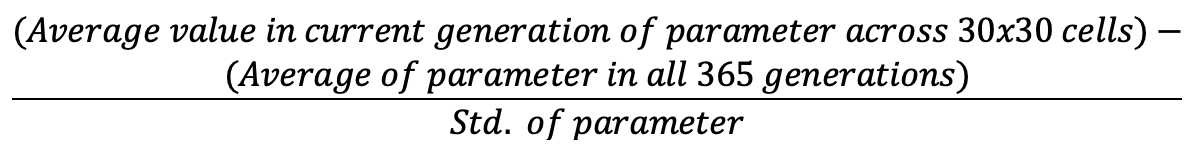

The following graphs represent the standardization of the parameters:  
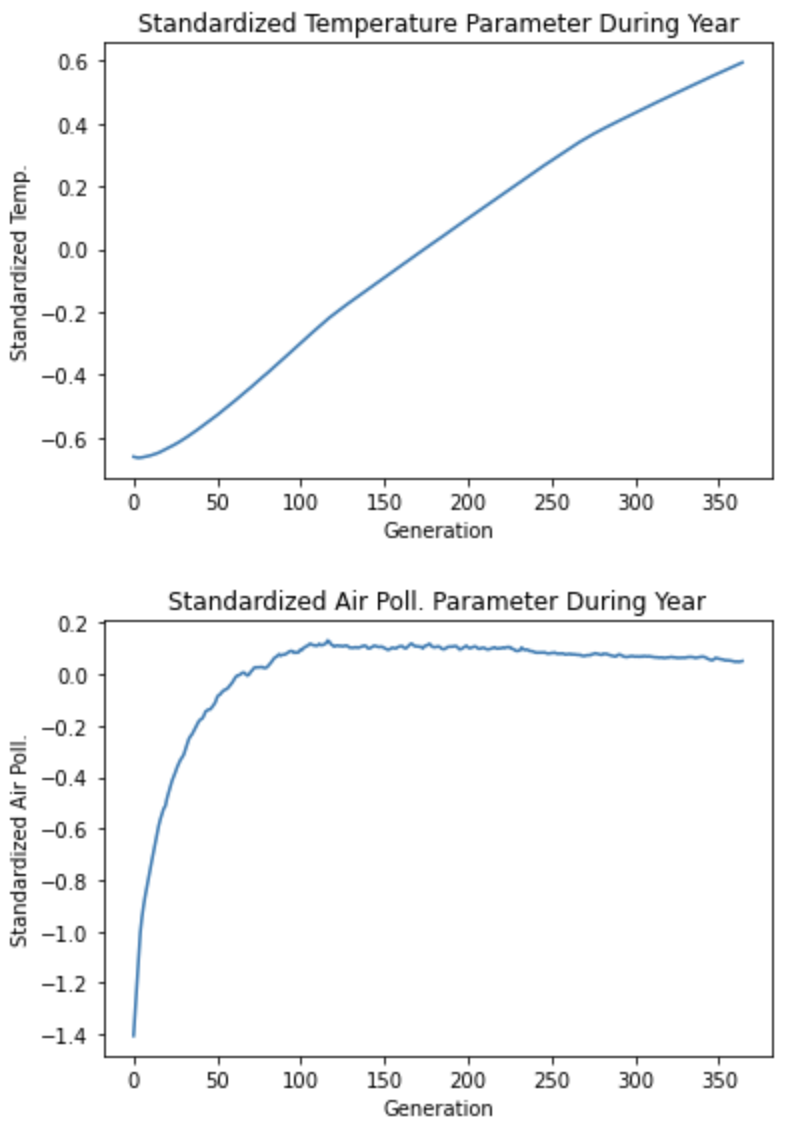

## D. Confirm the assumption that air pollution ejected from the cities inflicts other components of the world

### 1. Correlation of air pollution by other parameters of the world over the year

We used `"Pearson correlation coefficient"` to calculate the correlation between air pollution in each generation to temperature.  
We found out that the correlation was **0.55842228**.

### 2. Sensitivity of the world by the air pollution value, with different air pollution values

We tested the change of air pollution ejected by the cities in 4 different values:  

> ### 12% of air pollution:
> Measurement of the parameters across one year (365 generations):  
>
>|   Parameter   	|  Min 	| Max 	| Average 	| Standard Deviation 	|
>|:-------------:	|:----:	|:---:	|:-------:	|:------------------:	|
>|  **Temperature**  	|  -50 	| 150 	| 53.1405 	|       50.8807      	|
>| **Air Pollution** 	| 1.00 	|  0  	|  0.6145 	|       0.4519       	|
>
> As the change of **4% percentage of ejected air pollution**, we could see increase of average temperature by **~2.4 celsius**.

> ### 9% of air pollution:
> Measurement of the parameters across one year (365 generations):
>
>|   Parameter   	|  Min 	| Max 	| Average 	| Standard Deviation 	|
>|:-------------:	|:----:	|:---:	|:-------:	|:------------------:	|
>|  **Temperature**  	|  -50 	| 150 	| 51.2336 	|       50.2775      	|
>| **Air Pollution** 	| 1.00 	|  0  	|  0.6181 	|       0.4822       	|
>
> As the change of **1% percentage of ejected air pollution**, we could see increase of average temperature by **~0.5 celsius**.

> ### 6% of air pollution:
> Measurement of the parameters across one year (365 generations):
>
>|   Parameter   	|  Min 	| Max 	| Average 	| Standard Deviation 	|
>|:-------------:	|:----:	|:---:	|:-------:	|:------------------:	|
>|  **Temperature**  	|  -50 	| 150 	| 49.8418 	|       45.2131      	|
>| **Air Pollution** 	| 1.00 	|  0  	|  0.5967 	|       0.4293       	|
>
> As the change of **-2% percentage of ejected air pollution**, we could see decrease of average temperature by **~1.1 celsius**.

> ### 4% of air pollution:
> Measurement of the parameters across one year (365 generations):
>
>|   Parameter   	|  Min 	| Max 	| Average 	| Standard Deviation 	|
>|:-------------:	|:----:	|:---:	|:-------:	|:------------------:	|
>|  **Temperature**  	|  -50 	| 150 	| 48.6573 	|       41.3691      	|
>| **Air Pollution** 	| 1.00 	|  0  	|  0.5990 	|       0.4555       	|
>
> As the change of **-4% percentage of ejected air pollution**, we could see decrease of average temperature by **~2.1 celsius**.

As we can see, the world is sensitive to the levels of air pollution it has.  
The more air pollution ejected, the faster the world will be heated (and the less, the slower the world will be heated).

## Conclusion
The air pollution effecting the whole world as the assumption suggest.  
If the change the air pollution at first generation, the world should **heat faster** than starting it without air pollution at all.  
By that way, each change in the air pollution should effect the heat accordingly.  
As the result of running the automaton over time, the global warming is definitely affected by the air pollution ejected from the cities.  
Therefore, global warming is indeed affecting the world as the result of destruction of the world components by temperature heat.